<font color = green >

# Grid earch 
</font>

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [7]:
%matplotlib notebook

In [8]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [9]:
digits = load_digits()
X, y = digits.data, digits.target == 1
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

<font color = green >

### Grid search by $\gamma$ parameter   of SVC
</font>

In [13]:
clf = SVC() 
grid_values = {'gamma': [0.001, 0.01, 0.05, 0.1, 1, 10, 100],
              'kernel': ['linear', 'rbf']} # provide param and range

In [14]:
grid_clf = GridSearchCV(clf, param_grid = grid_values, return_train_score=True) # create grid search 
# return_train_score=True  allowas to access the intermediate scores 
grid_clf.fit(X_train, y_train)
print('Grid best parameter (max. accuracy): ', grid_clf.best_params_)
print('Grid best score (accuracy): ', grid_clf.best_score_)


/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Grid best parameter (max. accuracy):  {'gamma': 0.001, 'kernel': 'rbf'}
Grid best score (accuracy):  0.9962880475129918


In [15]:
print('Grid best score (accuracy): ', grid_clf.best_score_)
print (grid_clf.cv_results_['mean_train_score'])
print (grid_clf.cv_results_['mean_test_score'])
grid_clf.cv_results_


Grid best score (accuracy):  0.9962880475129918
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[0.97253155 0.99628805 0.97253155 0.91982183 0.97253155 0.89680772
 0.97253155 0.89680772 0.97253155 0.89680772 0.97253155 0.89680772
 0.97253155 0.89680772]


{'mean_fit_time': array([0.00791009, 0.01219289, 0.00758147, 0.07380652, 0.00775107,
        0.07553601, 0.00767676, 0.07415946, 0.00750113, 0.05853009,
        0.00771578, 0.05798562, 0.00748984, 0.05740062]),
 'std_fit_time': array([0.00090301, 0.00094347, 0.00089941, 0.00113506, 0.00088744,
        0.00130571, 0.00077842, 0.00031867, 0.00080628, 0.00053713,
        0.00079142, 0.00080751, 0.00078894, 0.00012909]),
 'mean_score_time': array([0.00122945, 0.00558726, 0.00110292, 0.03218619, 0.00114886,
        0.03208907, 0.00112478, 0.03219215, 0.00109537, 0.0258317 ,
        0.00113511, 0.02537473, 0.00109871, 0.02512447]),
 'std_score_time': array([2.63516951e-05, 7.68000543e-04, 2.42820476e-05, 3.17015454e-04,
        2.64901055e-05, 3.33074216e-04, 1.80877156e-06, 4.85969876e-04,
        1.89662275e-05, 4.27082992e-04, 2.63579260e-05, 3.18023356e-04,
        2.30542534e-05, 3.63676698e-05]),
 'param_gamma': masked_array(data=[0.001, 0.001, 0.01, 0.01, 0.05, 0.05, 0.1, 0.1, 1, 1,
 

In [16]:
print (grid_clf.best_estimator_.score(X_test, y_test))
print (grid_clf.score(X_test, y_test))
print (np.mean(grid_clf.best_estimator_.predict(X_test)))
print (np.mean(grid_clf.predict(X_test)))


0.9977777777777778
0.9977777777777778
0.09333333333333334
0.09333333333333334


In [ ]:
# Conclusion you may use grid_clf the same as grid_clf.best_estimator_ 

<font color = green >

### Grid search using roc_auc 
</font>

In [29]:
grid_clf_auc = GridSearchCV(clf, param_grid = grid_values, scoring = 'roc_auc')
grid_clf_auc.fit(X_train, y_train)

# compute the roc_auc using predicted decisions_functions 
y_grid_auc_scores = grid_clf_auc.decision_function(X_test)
print('Test set AUC: ', roc_auc_score(y_test, y_grid_auc_scores))

# derive roc_auc from grid_search
print('Grid best parameter (max. AUC): ', grid_clf_auc.best_params_)
print('Grid best score (AUC): ', grid_clf_auc.best_score_)

# Note:  values mentioned above  may differ due to split difference 

# compare with not the best parameter value 
clf = SVC(kernel='rbf', gamma=0.1).fit(X_train,y_train) 
y_scores = clf.decision_function(X_test)
print('Test set AUC: ', roc_auc_score(y_test, y_scores))

Test set AUC:  0.99982858122393
Grid best parameter (max. AUC):  {'gamma': 0.001}
Grid best score (AUC):  0.9998741278302142
Test set AUC:  0.9821438774927147


<font color = green >

### Supported metrics 
</font>

In [30]:
from sklearn.metrics.scorer import SCORERS
print(sorted(list(SCORERS.keys())))

['accuracy', 'adjusted_mutual_info_score', 'adjusted_rand_score', 'average_precision', 'completeness_score', 'explained_variance', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'fowlkes_mallows_score', 'homogeneity_score', 'log_loss', 'mean_absolute_error', 'mean_squared_error', 'median_absolute_error', 'mutual_info_score', 'neg_log_loss', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_median_absolute_error', 'normalized_mutual_info_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'r2', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'roc_auc', 'v_measure_score']


<font color = green >

### Grid Search by multi metrics
</font>

In [34]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer

In [84]:
X, y= load_breast_cancer(return_X_y = True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

clf = DecisionTreeClassifier(random_state=0)
params_grid = {'max_depth': np.arange(3, 10),
              'max_leaf_nodes':list(range(20,100,20)),
              'max_features':list(range(2,10,2))
               }
grid_clf = GridSearchCV(clf, params_grid)
grid_clf.fit(X_train, y_train)

print('Grid best parameter: ', grid_clf.best_params_)
print('Grid best score: ', grid_clf.best_score_)


Grid best parameter:  {'max_depth': 3, 'max_features': 6, 'max_leaf_nodes': 20}
Grid best score:  0.9295774647887324


<font color = green >

### Seeting the params to clf
</font>

In [83]:
best_params = grid_clf.best_params_
# best_params.update({'random_state':0})
clf.set_params(**best_params)
# print ('clf params:', clf.get_params)
clf.fit(X_train, y_train)
clf.score (X_train, y_train)

0.9694835680751174

In [ ]:
# * ->

<font color = green >

# PGM
</font>

In [5]:
from pgmpy.models import BayesianModel
from pgmpy.factors.discrete import TabularCPD
from datetime import datetime

<font color = green >

### Additional functions to convert samaim model to pgmpy 
</font>

In [6]:
def parse_net_file(input_file_name, fp_output= None):
    # Converts PGM model created by SAMAIM  and creates file for pgmpy in  output_file provided 

    network_lines = read_file(input_file_name)
    if not network_lines:
        return

    nodes_and_output_information = get_nodes_and_variable_cards(network_lines)
    nodes_and_output_information = get_parrent_variables(network_lines, nodes_and_output_information)

    output_content = None
    if fp_output:
#         fp_output = fp_output.replace('.py', '_{}.py'.format(datetime.now().strftime("%y%m%d")))
        output_content = init_content()

    pgm_model, output_content, model_options= build_model(nodes_and_output_information, output_content)
    pgm_model.model_options = model_options
    pgm_model = add_options_to_native_structure(pgm_model)

    if output_content:
        output_content = add_demo_lines(output_content)
        write_result_to_file(fp_output, output_content)

    return pgm_model

def get_nodes_and_variable_cards(network_lines):
    nodes_and_content = find_nodes(network_lines)
    nodes_and_output_information = {}
    for node_el in nodes_and_content:
        variable = node_el[0]
        variable_card = int(node_el[1]['states'].count('"') / 2)
        options_string = node_el[1]['states']
        options_list=[]
        for i in range (variable_card):
            start_index = options_string.index('"')
            options_string = options_string [start_index+1  : ]
            end_index = options_string.index('"')
            option_name= options_string[: end_index]
            options_list.append(option_name)
            options_string = options_string[end_index + 1:]

        nodes_and_output_information[variable] = {'variable card': variable_card, 'options': options_list}
    return nodes_and_output_information

def get_parrent_variables(network_lines, nodes_and_output_information):
    for current_line in network_lines:
        if len(current_line) > 0 and current_line.lower().startswith('potential '):
            parrent_nodes = get_parrent_nodes(current_line)
            nodes_and_output_information[parrent_nodes[0]]['variables'] = parrent_nodes[1]

            node_index = network_lines.index(current_line)
            cpd_of_node = get_cpd_of_node(network_lines, node_index)
            nodes_and_output_information[parrent_nodes[0]]['cpd'] = cpd_of_node
    return nodes_and_output_information

def build_model(nodes_and_output_information_dict, output_content_list):
    edges = elisit_edges(nodes_and_output_information_dict)
    model = BayesianModel(edges)

    if output_content_list:
        output_content = add_creating_model_content(output_content_list, edges)


    for node_name in nodes_and_output_information_dict:
        cpd, output_content_list = elicit_cpds(node_name, nodes_and_output_information_dict, output_content_list)
        model.add_cpds((cpd))

    model_options, output_content = elicit_model_options(node_name, nodes_and_output_information_dict, output_content_list)

    return model, output_content, model_options

def read_file(input_file_name):
    try:
        input_file = open(input_file_name)
        network_lines = input_file.read().split('\n')
    except Exception as details:
        network_lines = None
        print ('error at opening input file {}. Details: {}'.format(network_lines, details))
        return

    input_file.close()
    return network_lines

def find_nodes(network_lines):
    result = []
    for line in network_lines:
        if len(line) > 0 and line.replace('\t', '').lower().startswith('node '):
            node_name = line.replace('\t', '').replace('node ', '').replace('\r', '')
            node_index = network_lines.index(line)
            node_content = get_all_node_content(network_lines, node_index)
            result.append([node_name, node_content])
    return result

def get_all_node_content(network_file, node_index):
    result_content = {}
    end_line = False
    i_line = node_index + 2  # pass one line since it should be '{'
    while not end_line:
        current_line = network_file[i_line]
        if current_line.startswith('}'):
            end_line = True
        else:
            parse_content_result = parse_content_line(current_line)
            if parse_content_result:
                for el in parse_content_result:
                    result_content[el[0]] = el[1]
        i_line += 1
    return result_content

def parse_content_line(current_line):
    parsing_line_result = []
    if '=' in current_line:
        value_start_index = current_line.index('=') + 1
    else:
        message = 'Wrong file format. It is expected "key = value" format of every node content '
        raise TypeError(message)
    content_keys = {'states', 'position', 'excludepolicy', 'ismapvariable', 'ID', 'label', 'DSLxSUBMODEL',
                    'DSLxEXTRA_DEFINITIONxDIAGNOSIS_TYPE', 'diagnosistype'}

    for content_key in content_keys:
        if current_line.replace('\t', '').startswith(content_key):
            value = current_line[value_start_index:].replace(';', '')
            parsing_line_result.append([content_key, value])
    return parsing_line_result

def get_parrent_nodes(current_line):
    value_start_index = current_line.index('(')
    value_line = current_line[value_start_index:]
    separator_index = value_line.index('|')
    variable = value_line[:separator_index].replace('(', '').replace(' ', '')
    parrent_variables_line = value_line[separator_index + 1:].replace(')', '')
    parrent_variables_raw = parrent_variables_line.split(' ')

    parrent_variables = [el for el in parrent_variables_raw if len(el) > 0 and el != '\r']
    return [variable, parrent_variables]

def get_cpd_of_node(network_lines, node_index):
    content_cpd = get_cpd_content(network_lines, node_index)
    if len(content_cpd) > 1:
        content_cpd_transposed = np.array(content_cpd).transpose()
    else:
        content_cpd_transposed = (content_cpd)
    return content_cpd_transposed

def get_cpd_content(network_file, node_index):
    result_content = []
    end_line = False
    i_line = node_index + 2
    while not end_line:
        current_line = network_file[i_line]
        if current_line.startswith('}'):
            end_line = True
        else:
            if current_line:
                line = current_line.replace('\tdata = ', '').replace('(\t', '').replace('\t)', '').replace(';','').replace('\t\t', '')
                raw_values = line.split('\t')
                line_result = []
                for raw_value in raw_values:
                    value = raw_value.replace('(', '').replace(')', '')
                    line_result.append(float(value))
                result_content.append(line_result)
        i_line += 1
    return result_content

def elisit_edges(nodes_and_output_information):
    edges = []
    for node in nodes_and_output_information:
        if len(nodes_and_output_information[node]['variables']) > 0:
            for parrent_node in nodes_and_output_information[node]['variables']:
                edges.append((parrent_node, node))
    return edges

def elicit_cpds(node, nodes_and_output_information, output_content):
    node_information = nodes_and_output_information[node]
    if len(node_information['variables']) > 0:
        node_evidence_card = get_evidence_card(node_information['variables'], nodes_and_output_information)
        result_cpd = TabularCPD(variable=node, variable_card=node_information['variable card'],
                                values=node_information['cpd'],
                                evidence=node_information['variables'], evidence_card=node_evidence_card)
        if output_content:
            cpd = np.array(node_information['cpd']).tolist()
            output_content = add_cpd_depended_node_content(output_content, variable=node,
                                                                 variable_card=node_information['variable card'],
                                                                 values=cpd,
                                                                 evidence=node_information['variables'],
                                                                 evidence_card=node_evidence_card)

    else:
        result_cpd = TabularCPD(node, node_information['variable card'], node_information['cpd'])
        if output_content:
            output_content = add_cpd_node_content(output_content, variable=node,
                                                         variable_card=node_information['variable card'],
                                                         values=node_information['cpd'])

    return result_cpd, output_content


def get_evidence_card(parrent_nodes, nodes_and_output_information):
    return [nodes_and_output_information[parrent_node]['variable card'] for parrent_node in parrent_nodes]

def elicit_model_options(node_name, nodes_and_output_information_dict, output_content_list):
    model_options = {}

    for node_name in nodes_and_output_information_dict:
        model_options[node_name]= nodes_and_output_information_dict[node_name]['options']

    if output_content_list:
        options_string = 'model.model_options = {'
        for node_name in nodes_and_output_information_dict:
            options_string = '{}"{}" : ['.format(options_string, node_name)

            for node_option in nodes_and_output_information_dict[node_name]['options']:
                options_string = '{}"{}" ,'.format(options_string , node_option)
            options_string = options_string[: (len(options_string)-1)] # remove the lsat comma
            options_string = '{}],'.format(options_string)
        options_string = options_string [: (len(options_string) - 1)]  # remove the lsat comma
        options_string += '}'
        output_content_list.append(options_string)
        output_content_list.append('# adding options names')
        output_content_list.append('for cpd in model.cpds:')
        output_content_list.append('    cpd.state_names = model.model_options')
        output_content_list.append('# Now you can use model')


    return model_options, output_content_list

def add_options_to_native_structure(pgm_model):
    for cpd in pgm_model.cpds:
        cpd.state_names = pgm_model.model_options
    return pgm_model

def init_content():
    output_content = []
    output_content.append('from pgmpy.models import BayesianModel')
    output_content.append('from pgmpy.factors.discrete import TabularCPD')
    # output_content.append('import math')
    output_content.append('\n')
    return output_content

def add_creating_model_content(output_content, edges):

    model_string = 'model = BayesianModel(['
    for edge in edges:
        model_string = model_string + str(edge).replace('\'', '"') + ','
    model_string = model_string[: (len(model_string) - 1)]
    model_string = model_string + '])\n'
    output_content.append(model_string)
    return output_content

def add_cpd_depended_node_content(output_content, variable, variable_card, values, evidence, evidence_card):
    cpd_string = '{}_cpd =TabularCPD(variable="{}", variable_card= {} , values={}, evidence={}, evidence_card={})'.format(
        variable, variable, variable_card, values, evidence, evidence_card)
    cpd_string = cpd_string.replace("\n", "").replace('\'', '"')
    output_content = add_cpd_model_to_content(output_content, cpd_string, variable)
    return output_content


def add_cpd_model_to_content(output_content, cpd_string, variable):
    output_content.append(cpd_string)
    add_cpd_string = 'model.add_cpds({}_cpd)\n'.format(variable)
    output_content.append(add_cpd_string)
    return output_content

def add_cpd_node_content(output_content, variable, variable_card, values):
    cpd_string = '{}_cpd =TabularCPD(variable="{}", variable_card= {} , values={})'.format(variable, variable,
                                                                                           variable_card, values)
    cpd_string = cpd_string.replace("\n", "").replace('\'', '"')
    output_content = add_cpd_model_to_content(output_content, cpd_string, variable)
    return output_content

def add_demo_lines(output_content):
    demo_string = 'for el in model.get_cpds():'
    output_content.append(demo_string)
    demo_string = '    print el'
    output_content.append(demo_string)
    return output_content

def write_result_to_file(fp_output, output_content):
    try:
        with open(fp_output, 'w') as f:
            for el in output_content:
                f.writelines(el)
                f.write('\n')
            
        print ('Created file {}'.format(fp_output))
    except Exception as details:
        print ('error at saving result to file {}. Details: {}'.format(fp_output, details))



In [7]:
import os
cwd= os.getcwd() # current working directory
path = os.path.join(cwd,'PGM')

<font color = green >

### Convert samaim model to pgmpy 
</font>

In [9]:
fp=  os.path.join(path , 'cooperation.net')
model = parse_net_file(fp)
print ('sample of cpd:')
for el in model.get_cpds()[3:5]:
    print (el)
print ('\nNow you can use pgmpy model')
    

sample of cpd:
+-------------------------------+-----+
| requirements(no_requirements) | 0.1 |
+-------------------------------+-----+
| requirements(partial)         | 0.6 |
+-------------------------------+-----+
| requirements(complete)        | 0.3 |
+-------------------------------+-----+
+--------------+-----+
| time(normal) | 0.7 |
+--------------+-----+
| time(urgent) | 0.3 |
+--------------+-----+

Now you can use pgmpy model


<font color = green >

### Convert samaim model to pgmpy 
</font>

In [10]:
fp_output = os.path.join(path,'pgm_model.py')
converted_model = parse_net_file(fp, fp_output)

Created file /Users/new/science/studies/otsebriy/data_science_camp/PGM/pgm_model.py


<font color = green >

### Load content of file with converted pgmpy model
</font>

In [11]:
with open(fp_output, 'r') as f:
    content = f.read()
print (content)

from pgmpy.models import BayesianModel
from pgmpy.factors.discrete import TabularCPD


model = BayesianModel([("requirements", "scope"),("team_level", "scope"),("time", "scope"),("team_level", "quality"),("requirements", "quality"),("time", "quality"),("quality", "cooperation"),("scope", "cooperation")])

scope_cpd =TabularCPD(variable="scope", variable_card= 2 , values=[[0.1, 0.01, 0.3, 0.2, 0.6, 0.5, 0.2, 0.1, 0.5, 0.4, 0.8, 0.7, 0.4, 0.2, 0.8, 0.7, 0.9, 0.8], [0.9, 0.99, 0.7, 0.8, 0.4, 0.5, 0.8, 0.9, 0.5, 0.6, 0.2, 0.3, 0.6, 0.8, 0.2, 0.3, 0.1, 0.2]], evidence=["requirements", "team_level", "time"], evidence_card=[3, 3, 2])
model.add_cpds(scope_cpd)

quality_cpd =TabularCPD(variable="quality", variable_card= 2 , values=[[0.8, 0.9, 0.7, 0.8, 0.6, 0.7, 0.7, 0.8, 0.5, 0.6, 0.3, 0.4, 0.5, 0.6, 0.3, 0.4, 0.1, 0.2], [0.2, 0.1, 0.3, 0.2, 0.4, 0.3, 0.3, 0.2, 0.5, 0.4, 0.7, 0.6, 0.5, 0.4, 0.7, 0.6, 0.9, 0.8]], evidence=["team_level", "requirements", "time"], evidence_card=[3, 3, 2])
model.ad

<font color = green >

### Create the pgmpy model
note: To use converted model just copy content of file to cell  
</font>

In [12]:
model = BayesianModel([("requirements", "scope"),("team_level", "scope"),("time", "scope"),("team_level", "quality"),("requirements", "quality"),("time", "quality"),("quality", "cooperation"),("scope", "cooperation")])

scope_cpd =TabularCPD(
    variable="scope", 
    variable_card= 2 , 
    values=[[0.1, 0.01, 0.3, 0.2, 0.6, 0.5, 0.2, 0.1, 0.5, 0.4, 0.8, 0.7, 0.4, 0.2, 0.8, 0.7, 0.9, 0.8],
            [0.9, 0.99, 0.7, 0.8, 0.4, 0.5, 0.8, 0.9, 0.5, 0.6, 0.2, 0.3, 0.6, 0.8, 0.2, 0.3, 0.1, 0.2]],
    evidence=["requirements", "team_level", "time"], 
    evidence_card=[3, 3, 2])
model.add_cpds(scope_cpd)

quality_cpd =TabularCPD(
    variable="quality", 
    variable_card= 2 , 
    values=[[0.8, 0.9, 0.7, 0.8, 0.6, 0.7, 0.7, 0.8, 0.5, 0.6, 0.3, 0.4, 0.5, 0.6, 0.3, 0.4, 0.1, 0.2], 
            [0.2, 0.1, 0.3, 0.2, 0.4, 0.3, 0.3, 0.2, 0.5, 0.4, 0.7, 0.6, 0.5, 0.4, 0.7, 0.6, 0.9, 0.8]],
    evidence=["team_level", "requirements", "time"],
    evidence_card=[3, 3, 2])
model.add_cpds(quality_cpd)

team_level_cpd =TabularCPD(
    variable="team_level", 
    variable_card= 3 , 
    values=[[0.2, 0.4, 0.4]])
model.add_cpds(team_level_cpd)

requirements_cpd =TabularCPD(
    variable="requirements",
    variable_card= 3,
    values=[[0.1, 0.6, 0.3]])
model.add_cpds(requirements_cpd)

time_cpd =TabularCPD(variable="time", variable_card= 2 , values=[[0.7, 0.3]])
model.add_cpds(time_cpd)

cooperation_cpd =TabularCPD(
    variable="cooperation", 
    variable_card= 2 , 
    values=[[0.3, 0.1, 0.8, 0.6], [0.7, 0.9, 0.2, 0.4]], 
    evidence=["quality", "scope"], 
    evidence_card=[2, 2])
model.add_cpds(cooperation_cpd)

model.model_options = {
    "scope" : ["complete" ,"incomplete" ],
    "quality" : ["low" ,"normal" ],
    "team_level" : ["JN" ,"MID" ,"Senior" ],
    "requirements" : ["no_requirements" ,"partial" ,"complete" ],
    "time" : ["normal" ,"urgent" ],
    "cooperation" : ["successful" ,"failed" ]}

# adding options names
for cpd in model.cpds:
    cpd.state_names = model.model_options

# Now you can use model
for el in model.get_cpds()[3:5]:
    print (el)
print ('\nNow you can use pgmpy model')


+-------------------------------+-----+
| requirements(no_requirements) | 0.1 |
+-------------------------------+-----+
| requirements(partial)         | 0.6 |
+-------------------------------+-----+
| requirements(complete)        | 0.3 |
+-------------------------------+-----+
+--------------+-----+
| time(normal) | 0.7 |
+--------------+-----+
| time(urgent) | 0.3 |
+--------------+-----+

Now you can use pgmpy model


<font color = green >

### Predict

</font>

In [13]:
predict_data= pd.DataFrame([[0,0,0]],columns=["requirements", "team_level", "time"])
print ('predict_data:\n',predict_data)
y_pred = model.predict(predict_data)
y_pred

predict_data:
    requirements  team_level  time
0             0           0     0


cooperation quality       scope
0      failed     low  incomplete

<font color = green >

### Review probability

</font>

In [14]:
y_prob = model.predict_probability(predict_data)
y_prob

cooperation_failed  cooperation_successful  quality_low  quality_normal  \
0                0.78                    0.22          0.8             0.2   

   scope_complete  scope_incomplete  
0             0.1               0.9

In [15]:
# expected due to samaim 'cooperation' model 
# scope_complete, scope_incomplete, quality_low, quality_normal, cooperation_successful, cooperation_failed
# 0, 0.1, 0.9, 0.8, 0.2, 0.22, 0.78

<font color = green >

### Train model 

</font>

<font color = green >

#### Create blank model

</font>

In [52]:
model = BayesianModel([("requirements", "scope"),("team_level", "scope"),("time", "scope"),("team_level", "quality"),("requirements", "quality"),("time", "quality"),("quality", "cooperation"),("scope", "cooperation")])

model.model_options = {
    "scope" : ["complete" ,"incomplete" ],
    "quality" : ["low" ,"normal" ],
    "team_level" : ["JN" ,"MID" ,"Senior" ],
    "requirements" : ["no_requirements" ,"partial" ,"complete" ],
    "time" : ["normal" ,"urgent" ],
    "cooperation" : ["successful" ,"failed" ]}

# adding options names
for cpd in model.cpds:
    cpd.state_names = model.model_options

for el in model.get_cpds()[3:5]:
    print (el)
print ('\nNow you can fit pgmpy model')



Now you can fit pgmpy model


<font color = green >

#### Get train data

</font>

In [53]:
fp = os.path.join(path,'simulated_10k.dat')
train_data= pd.read_csv(fp)
print ('Missed values:\n\n{}'.format(train_data.isnull().sum()))
train_data.head()


Missed values:

requirements    488
time            499
team_level      484
scope           501
quality         533
cooperation     517
dtype: int64


requirements    time team_level       scope quality cooperation
0      partial  normal        NaN         NaN  normal      failed
1      partial  normal        MID  incomplete     NaN      failed
2      partial  normal     Senior    complete  normal  successful
3     complete  normal     Senior    complete  normal  successful
4     complete     NaN     Senior    complete  normal  successful

In [54]:
# from pgmpy.estimators import MaximumLikelihoodEstimator
from pgmpy.estimators import BayesianEstimator

<font color = green >

#### Fit 

</font>

In [77]:
model.fit(train_data)# default estimator = MaximumLikelihoodEstimator
print (model.get_cpds('requirements'))
print (model.get_cpds('time'))
print (model.get_cpds('team_level'))
print ('\nNow you can use pgmpy model')


+-------------------------------+-----------+
| requirements(complete)        | 0.298186  |
+-------------------------------+-----------+
| requirements(no_requirements) | 0.0997135 |
+-------------------------------+-----------+
| requirements(partial)         | 0.602101  |
+-------------------------------+-----------+
+--------------+----------+
| time(normal) | 0.702769 |
+--------------+----------+
| time(urgent) | 0.297231 |
+--------------+----------+
+--------------------+----------+
| team_level(JN)     | 0.195608 |
+--------------------+----------+
| team_level(MID)    | 0.401719 |
+--------------------+----------+
| team_level(Senior) | 0.402674 |
+--------------------+----------+

Now you can use pgmpy model


<font color = green >

### Check learned model prediction

</font>

In [80]:
print ('Note: You need to review the assigned indices of values of variables after fitting since they appear in alphabetic order !') 
predict_data= pd.DataFrame([[1,0,0]],columns=["requirements", "team_level", "time"])
print ('predict_data:\n',predict_data)

y_prob = model.predict_probability(predict_data)
y_prob

Note: You need to review the assigned indices of values of variables after fitting since they appear in alphabetic order !
predict_data:
    requirements  team_level  time
0             1           0     0


cooperation_failed  cooperation_successful  quality_low  quality_normal  \
0            0.792189                0.207811     0.803738        0.196262   

   scope_complete  scope_incomplete  
0        0.028037          0.971963

<font color = green >

## Apply PGM to Tennis  data set 

</font>

<font color = green >

### Load data

</font>

In [192]:
path = os.path.join(cwd,'data')
fp = os.path.join(path,'tennis.csv')
train_data= pd.read_csv(fp)
del train_data['temp']

features = list(train_data)[:-1]
target = list(train_data)[-1]
features , target

(['outlook', 'humidity', 'wind'], 'play')

<font color = green >

### Create model

</font>

In [170]:
model = BayesianModel([(feature, target)  for feature in features])
model.edges()

[('outlook', 'play'), ('humidity', 'play'), ('wind', 'play')]

In [173]:
print (model.nodes())
print ()

['outlook', 'play', 'humidity', 'wind']

<font color = green >

### Train

</font>

In [187]:
model.fit(train_data)
for feature in features:
    print(model.get_cpds(feature))

+-------------------+----------+
| outlook(overcast) | 0.285714 |
+-------------------+----------+
| outlook(rainy)    | 0.357143 |
+-------------------+----------+
| outlook(sunny)    | 0.357143 |
+-------------------+----------+
+------------------+-----+
| humidity(high)   | 0.5 |
+------------------+-----+
| humidity(normal) | 0.5 |
+------------------+-----+
+-------------+----------+
| wind(False) | 0.571429 |
+-------------+----------+
| wind(True)  | 0.428571 |
+-------------+----------+


<font color = green >

### Predict

</font>

In [188]:
predict_data= pd.DataFrame([[0,1,0]],columns=features)
print ('predict_data:\n',predict_data)
y_pred = model.predict(predict_data)
y_pred

predict_data:
    outlook  humidity  wind
0        0         1     0


play
0  yes

In [189]:
y_proba = model.predict_probability(predict_data)
y_proba

play_no  play_yes
0      0.0       1.0

In [78]:
# * -> naive bayes 

<font color = green >

# Naive Bayes classification
</font>

In [1]:
from sklearn.naive_bayes import GaussianNB

In [3]:
def plot_data_logistic_regression(X,y,legend_loc= None, title= None):
    '''
    :param X: 2 dimensional ndarray
    :param y:  1 dimensional ndarray. Use y.ravel() if necessary
    :return:
    '''

    positive_indices = (y == 1)
    negative_indices = (y == 0)
#     import matplotlib as mpl
    colors_for_points = ['grey', 'orange'] # neg/pos

    plt.scatter(X[negative_indices][:,0], X[negative_indices][:,1], s=40, c=colors_for_points [0], edgecolor = 'black', label='negative', alpha = 0.7)
    plt.scatter(X[positive_indices][:,0], X[positive_indices][:,1], s=40, c=colors_for_points [1], edgecolor = 'black',label='positive', alpha = 0.7)
    plt.title(title)
    plt.legend(loc= legend_loc)
    
def draw_linear_decision_boundaries_multiclass(clf,X):
    '''draws only the line  - use existing figure for it '''
    colors=  ['green','grey', 'orange', 'brown']
    x_line = np.linspace(X[:,0].min(),X[:,0].max(), 100)
    for w, b, color in zip(clf.coef_, clf.intercept_, colors):
        # Since class prediction with a linear model uses the formula y = w_0 x_0 + w_1 x_1 + b,
        # and the decision boundary is defined as being all points with y = 0, to plot x_1 as a
        # function of x_0 we just solve w_0 x_0 + w_1 x_1 + b = 0 for x_1:
        y_line = -(x_line  * w[0] + b) / w[1]
        ind = (X[:,0].min()< x_line) & (x_line <X[:,0].max()) & (X[:,1].min()< y_line) & (y_line <X[:,1].max() )
        plt.plot(x_line[ind] , y_line[ind], '-', c=color, alpha=.8)

    
def plot_decision_boundary_universal(clf, X_train, y_train, X_test=None, y_test= None, title=None, precision=0.1,plot_symbol_size = 50, ax= None,  is_extended=True, labels= None, features =None, is_to_show_train= True):
    '''
    expected to be universal for binary and multiclass classification but not tested for binary 
    '''
    # Create color maps - required by pcolormesh
    from matplotlib.colors import  ListedColormap
    features_number= X_train.shape[1]
    colors_for_areas= colors_for_points =  np.array(['grey', 'orange', 'green', 'brown'][:features_number])
    cmap_light = ListedColormap(colors_for_areas)

    mesh_step_size = precision #.01  # step size in the mesh
    if X_test is None or y_test is None:
        show_test= False
        X= X_train
    else:
        show_test= True
        X= np.concatenate([X_train,X_test], axis=0)
    x1_min, x1_max = X[:, 0].min() - .1, X[:, 0].max() + 0.1
    x2_min, x2_max = X[:, 1].min() - .1, X[:, 1].max() + 0.1
    # Create grids of pairs
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, mesh_step_size),
                         np.arange(x2_min, x2_max, mesh_step_size))
    # Flatten all samples
    target_samples_grid= (np.c_[xx1.ravel(), xx2.ravel()])
    if precision<0.05:
        print ('Calling to predict for all grid values (precision of drawing = {},\n you may configure to speed up e.g. precision=0.05)'.format(precision))
    Z = clf.predict(target_samples_grid)

    # Reshape the result to original meshgrid shape
    Z = Z.reshape(xx1.shape)

    if ax:
        plt.sca(ax)

    # Plot all meshgrid prediction
    plt.pcolormesh(xx1, xx2,Z, cmap = cmap_light, alpha=0.2)

    if is_to_show_train:
        # Plot train set
        plt.scatter(X_train[:, 0], X_train[:, 1], s=plot_symbol_size,
                    c=colors_for_points[y_train.astype(int)], edgecolor = 'black',alpha=0.6)
    # Plot test set
    if show_test:
        plt.scatter(X_test[:, 0], X_test[:, 1], marker='^', s=plot_symbol_size,
                c=colors_for_points[y_test.astype(int)],edgecolor = 'black',alpha=0.6)
    if  is_extended:
        
        # Create legend
        if labels is None:
            labels= ['negative','positive'] # assume this is for binary or for muticlass with labels 
        import matplotlib.patches as mpatches # use to assign lavels for colored points
        patches= [mpatches.Patch(color=colors_for_points[i], label=labels[i]) for i in range (len(labels))]
        plt.legend(handles=patches)
        if features is None:
            plt.xlabel('feature 1')
            plt.ylabel('feature 2')
        else: 
            plt.xlabel(features[0])
            plt.ylabel(features[1])

    else:
        plt.tick_params(
        top =False,
        bottom= False,
        left  = False,
        labelleft = False,
        labelbottom = False
        )
    plt.title(title)


In [16]:
from sklearn.model_selection import train_test_split

<font color = green >

### Simple synthetic classification set 
</font>

<IPython.core.display.Javascript object>


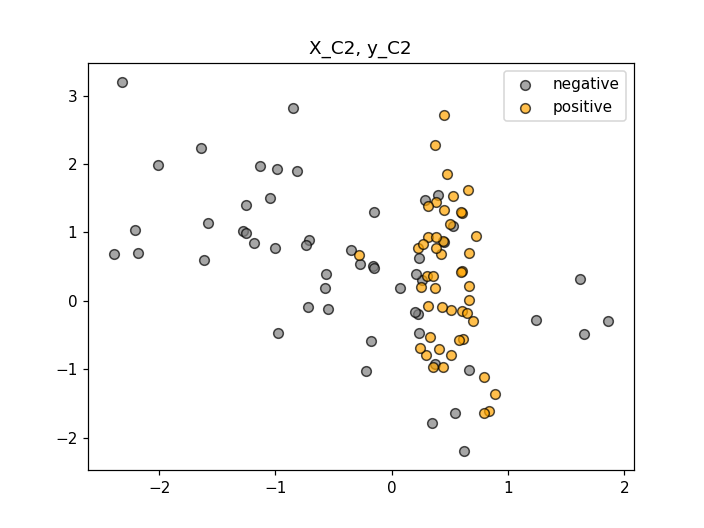

In [25]:
from sklearn.datasets import make_classification
# plt.title('Sample binary classification problem with two informative features')
X_C2, y_C2 = make_classification(n_samples = 100, n_features=2,
                                n_redundant=0, n_informative=2,
                                n_clusters_per_class=1, flip_y = 0.1,
                                class_sep = 0.5, random_state=0)
plt.figure()
plot_data_logistic_regression(X_C2,y_C2, title='X_C2, y_C2')


<IPython.core.display.Javascript object>


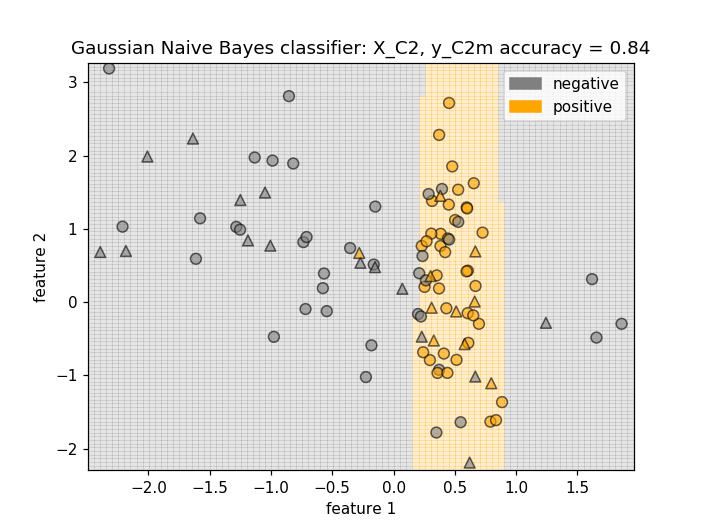

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X_C2, y_C2, random_state=0)
clf= GaussianNB().fit(X_train, y_train)
accuracy = clf.score(X_test, y_test) 
plt.figure()
plot_decision_boundary_universal(
    clf, X_train, y_train, X_test, y_test,
    title='Gaussian Naive Bayes classifier: X_C2, y_C2, accuracy = {}'.format(accuracy),
    precision=0.05)
    

<font color = green >

### Complicated synthetic classification set 
</font>

<IPython.core.display.Javascript object>


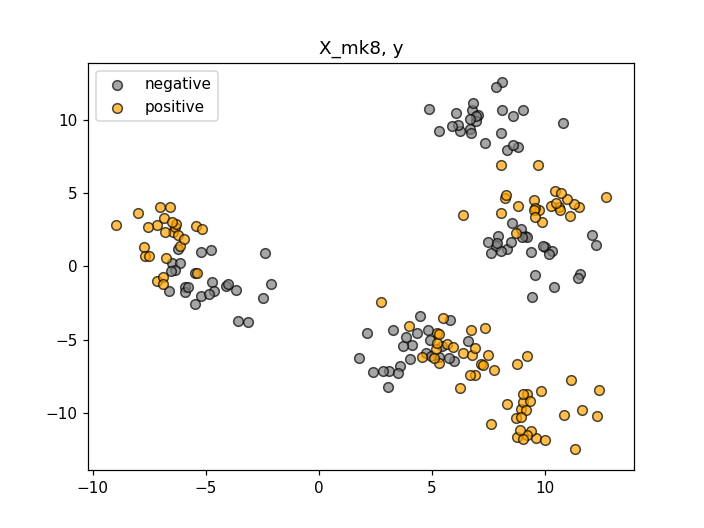

In [37]:
from sklearn.datasets import make_blobs
X_mk8, y_mk8 = make_blobs(n_samples = 200, n_features = 2, centers = 8, # centers impacts for y
                       cluster_std = 1.3, random_state = 4)
y = y_mk8 % 2 # make it binary since make_blobs  with centers = 8 creates y in [0..7]
plt.figure()
plot_data_logistic_regression(X_mk8,y, title='X_mk8, y')


<IPython.core.display.Javascript object>


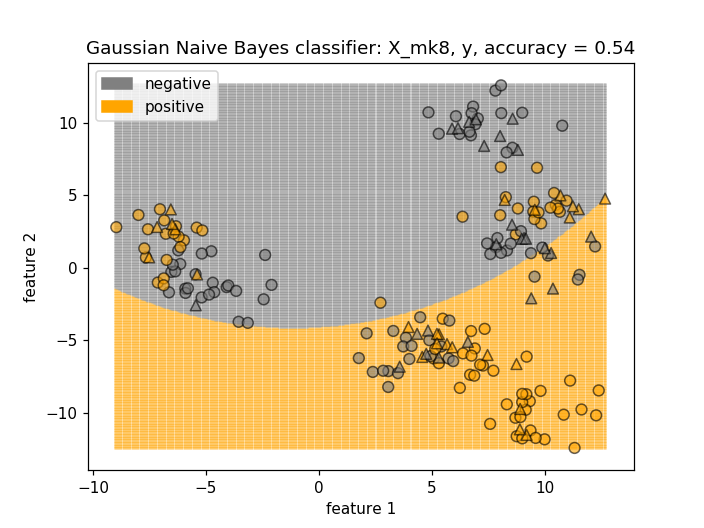

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X_mk8, y, random_state=0)
clf= GaussianNB().fit(X_train, y_train)
plt.figure()
accuracy_test = clf.score(X_test, y_test) 
plot_decision_boundary_universal(
    clf, X_train, y_train, X_test, y_test,
    title='Gaussian Naive Bayes classifier: X_mk8, y, accuracy = {}'.format(accuracy_test),
    precision=0.05)
    

<font color = green >

### Breast cancer  data set 
</font>

In [32]:
from sklearn.datasets import load_breast_cancer

In [41]:
X, y = load_breast_cancer(return_X_y= True)
X_train, X_test, y_train, y_test  =  train_test_split(X, y, random_state= 0)
clf= GaussianNB().fit(X_train, y_train)
accuracy_train = clf.score (X_train, y_train)
accuracy_test = clf.score (X_test, y_test)
print ('accuracy_train = {:.3%}\naccuracy_test = {:.3%}'.format(accuracy_train, accuracy_test))

accuracy_train = 95.070%
accuracy_test = 93.706%


In [ ]:
# * continue

<font color = green >

# Blight Tickets Classification

</font>

<font color = green >

## Problem statement 
</font>
The task is to solve one of the most pressing problems facing Detroit - blight. Blight violations are issued by the city to individuals who allow their properties to remain in a deteriorated condition. Every year, the city of Detroit issues millions of dollars in fines to residents and every year, many of these fines remain unpaid. Enforcing unpaid blight fines is a costly and tedious process, so the city wants to know: how can we increase blight ticket compliance?

The first step in answering this question is understanding when and why a resident might fail to comply with a blight ticket. This is where predictive modeling comes in. 

For this assignment, **the task is to predict whether a given blight ticket will be paid on time.**

You are provided with two data files for use in training and validating your models:

* train.csv - the training set (all tickets issued 2004-2011)
* test.csv - the test set (all tickets issued 2012-2016)


Each row in these two files corresponds to a single blight ticket, and includes information about when, why, and to whom each ticket was issued. 
The target variable is **compliance**, which is True if the ticket was paid early, on time, or within one month of the hearing data, False if the ticket was paid after the hearing date or not at all, and Null if the violator was found not responsible. Compliance, as well as a handful of other variables that will not be available at test-time, are only included in train.csv.

You are also provided with two files mapping from ticket id to addresses, and from addresses to lat/lon coordinates:
* addresses.csv 
* latlons.csv
Note: misspelled addresses may be incorrectly geolocated.

<font color = green >

## Data fields

### train.csv & test.csv

</font>

* ticket_id - unique identifier for tickets
* agency_name - Agency that issued the ticket
* inspector_name - Name of inspector that issued the ticket
* violator_name - Name of the person/organization that the ticket was issued to
* violation_street_number, violation_street_name, violation_zip_code - Address where the violation occurred
* mailing_address_str_number, mailing_address_str_name, city, state, zip_code, non_us_str_code, country - Mailing address of the violator
* ticket_issued_date - Date and time the ticket was issued
* hearing_date - Date and time the violator's hearing was scheduled
* violation_code, violation_description - Type of violation
* disposition - Judgment and judgement type
* fine_amount - Violation fine amount, excluding fees
* admin_fee - \$20 fee assigned to responsible judgments
* state_fee - \$10 fee assigned to responsible judgments late_fee - 10% fee assigned to responsible judgments discount_amount - discount applied, if any clean_up_cost - DPW clean-up or graffiti removal cost judgment_amount - Sum of all fines and fees grafitti_status - Flag for graffiti violations

<font color = green >

### train.csv only
</font>

* payment_amount - Amount paid, if any
* payment_date - Date payment was made, if it was received
* payment_status - Current payment status as of Feb 1 2017
* balance_due - Fines and fees still owed
* collection_status - Flag for payments in collections
* compliance target variable for prediction 
<br>- Null = Not responsible
<br>- 0 = Responsible, non-compliant
<br>- 1 = Responsible, compliant
* compliance_detail - More information on why each ticket was marked compliant or non-compliant

<font color = green >

## Evaluation
</font>

Predictions will be given as the probability that the corresponding blight ticket will be paid on time.

The evaluation metric for this assignment is the Area Under the ROC Curve (AUC).

Return a series of length 61001 with the data being the probability that each corresponding ticket from test.csv will be paid, and the index being the ticket_id.

Example:


`ticket_id
   284932    0.531842
   285362    0.401958
   285361    0.105928
   285338    0.018572
             ...
   376499    0.208567
   376500    0.818759
   369851    0.018528
   Name: compliance, dtype: float32`


<font color = green >

## Load the data  

</font>

<font color = green >

### Load train dataset 

</font>

In [4]:
import os
import pandas as pd
cwd= os.getcwd() # current working directory
path = os.path.join(cwd,'data')

In [186]:
def get_train_set():
    print ('loading provided train set.')
    fp = os.path.join(path,'lesson_12_train.csv')
    df_train = pd.read_csv(fp, encoding='ISO-8859-1',low_memory=False) 
    return df_train


df_train= get_train_set ()
df_train.head()

loading provided train set.


ticket_id                                     agency_name  \
0      22056  Buildings, Safety Engineering & Env Department   
1      27586  Buildings, Safety Engineering & Env Department   
2      22062  Buildings, Safety Engineering & Env Department   
3      22084  Buildings, Safety Engineering & Env Department   
4      22093  Buildings, Safety Engineering & Env Department   

     inspector_name                      violator_name  \
0   Sims, Martinzie  INVESTMENT INC., MIDWEST MORTGAGE   
1  Williams, Darrin           Michigan, Covenant House   
2   Sims, Martinzie                    SANDERS, DERRON   
3   Sims, Martinzie                       MOROSI, MIKE   
4   Sims, Martinzie                    NATHANIEL, NEAL   

   violation_street_number violation_street_name  violation_zip_code  \
0                   2900.0                 TYLER                 NaN   
1                   4311.0               CENTRAL                 NaN   
2                   1449.0            LONGFELLOW                 NaN   
3                   1441.0            LONGFELLOW                 NaN   
4                   2449.0             CHURCHILL                 NaN   

   mailing_address_str_number mailing_address_str_name     city     ...      \
0                         3.0                S. WICKER  CHICAGO     ...       
1                      2959.0       Martin Luther King  Detroit     ...       
2                     23658.0                 P.O. BOX  DETROIT     ...       
3                         5.0                ST. CLAIR  DETROIT     ...       
4                      7449.0                CHURCHILL  DETROIT     ...       

  clean_up_cost judgment_amount payment_amount balance_due  \
0           0.0           305.0            0.0       305.0   
1           0.0           855.0          780.0        75.0   
2           0.0             0.0            0.0         0.0   
3           0.0             0.0            0.0         0.0   
4           0.0             0.0            0.0         0.0   

          payment_date      payment_status collection_status grafitti_status  \
0                  NaN  NO PAYMENT APPLIED               NaN             NaN   
1  2005-06-02 00:00:00        PAID IN FULL               NaN             NaN   
2                  NaN  NO PAYMENT APPLIED               NaN             NaN   
3                  NaN  NO PAYMENT APPLIED               NaN             NaN   
4                  NaN  NO PAYMENT APPLIED               NaN             NaN   

                          compliance_detail  compliance  
0               non-compliant by no payment         0.0  
1  compliant by late payment within 1 month         1.0  
2            not responsible by disposition         NaN  
3            not responsible by disposition         NaN  
4            not responsible by disposition         NaN  

[5 rows x 34 columns]

<font color = green >

### Load test dataset 

</font>

In [187]:
def get_test_set():    
    print ('loading provided test set .')
    fp = os.path.join(path,'lesson_12_test.csv')
    df_test = pd.read_csv(fp)  # , encoding = 'ISO-8859-1')

    return df_test

df_test= get_test_set()
# df_test.describe()
list(df_test)

loading provided test set .


['ticket_id',
 'agency_name',
 'inspector_name',
 'violator_name',
 'violation_street_number',
 'violation_street_name',
 'violation_zip_code',
 'mailing_address_str_number',
 'mailing_address_str_name',
 'city',
 'state',
 'zip_code',
 'non_us_str_code',
 'country',
 'ticket_issued_date',
 'hearing_date',
 'violation_code',
 'violation_description',
 'disposition',
 'fine_amount',
 'admin_fee',
 'state_fee',
 'late_fee',
 'discount_amount',
 'clean_up_cost',
 'judgment_amount',
 'grafitti_status']

<font color = green >

### Load mappings datasets 

</font>

In [188]:
def get_additional_datasets ():
    print ('getting additional datasets.')
    fp = os.path.join(path,'lesson_12_addresses.csv')
    df_addresses= pd.read_csv(fp) 
    
    fp = os.path.join(path,'lesson_12_latlons.csv')
    df_latlons = pd.read_csv(fp)
    return df_addresses, df_latlons

df_addresses, df_latlons =  get_additional_datasets ()
print ('{}\n\n{}'.format(df_latlons.head(), df_addresses.head()))

getting additional datasets.
                                  address        lat        lon
0  4300 rosa parks blvd, Detroit MI 48208  42.346169 -83.079962
1                14512 sussex, Detroit MI  42.394657 -83.194265
2                3456 garland, Detroit MI  42.373779 -82.986228
3                5787 wayburn, Detroit MI  42.403342 -82.957805
4              5766 haverhill, Detroit MI  42.407255 -82.946295

   ticket_id                      address
0      22056       2900 tyler, Detroit MI
1      27586     4311 central, Detroit MI
2      22062  1449 longfellow, Detroit MI
3      22084  1441 longfellow, Detroit MI
4      22093   2449 churchill, Detroit MI


<font color = green >

### Get rid of samples with no information about payment 

</font>
Consider the domain knowledge and other environmental dependencies to figure out the features that may affect target, e.g. 

* location (lat and lon) of violator 
* the duration of between time ticket was issued and time it has been paid

In [189]:
def clean_blank_target(df):
    print ('cleaning blank target.')
    print ('Len before cleaning= {:,}'.format(len(df)))
    df = df.dropna(subset=['compliance'])
    # the same as  df_train = df_train[~df_train['compliance'].isnull()] 
    print ('Len after cleaning= {:,}'.format(len(df)))
    return df


df_train= clean_blank_target(df_train)


cleaning blank target.
Len before cleaning= 250,306
Len after cleaning= 159,880


<font color = green >

### Analyze and develop relevant features 

</font>
Consider the domain knowledge and other environmental dependencies to figure out the features that may affect target, e.g. 

* location (lat and lon) of violator 
* the duration of between time ticket was issued and time it has been paid

<font color = green >

#### Develop location feature

</font>
This requires to merge main dataset with mapped datasets (addresses and lat/lon)

In [190]:
def merge_additional_datasets(df, df_addresses, df_latlons):
    print ('merging with additional datasets.')
    df= pd.merge(df, df_addresses, how='left', left_on=['ticket_id'], right_on=['ticket_id'])
    df = pd.merge(df, df_latlons, how='left', left_on=['address'], right_on=['address'])
    df = df.reset_index()
    return df 

# Do the same for test data
# df_test_merged= pd.merge(df_test, df_addresses, how='left', left_on=['ticket_id'], right_on=['ticket_id'])
# df_test_merged = pd.merge(df_test_merged, df_latlons, how='left', left_on=['address'], right_on=['address'])
# df_test_merged= df_test_merged.reset_index()

# Merge train data with mapped data sets
df_train= merge_additional_datasets(df_train, df_addresses, df_latlons)
# Do the same for test data
df_test= merge_additional_datasets(df_test, df_addresses, df_latlons)

merging with additional datasets.
merging with additional datasets.


<font color = green >

#### Develop feature of duration between time of issue and time of payment

</font>


In [191]:
# Check the types of data features 
df_train.dtypes

index                           int64
ticket_id                       int64
agency_name                    object
inspector_name                 object
violator_name                  object
violation_street_number       float64
violation_street_name          object
violation_zip_code            float64
mailing_address_str_number    float64
mailing_address_str_name       object
city                           object
state                          object
zip_code                       object
non_us_str_code                object
country                        object
ticket_issued_date             object
hearing_date                   object
violation_code                 object
violation_description          object
disposition                    object
fine_amount                   float64
admin_fee                     float64
state_fee                     float64
late_fee                      float64
discount_amount               float64
clean_up_cost                 float64
judgment_amo

conclusion `ticket_issued_date` and `hearing_date` are `object` type thus need to convert first

In [192]:
def develop_days_diff(df) :
    print ('developing days-diff.')
    df['hearing_date'] = pd.to_datetime(df['hearing_date'])
    df['ticket_issued_date'] = pd.to_datetime(df['ticket_issued_date'])
    df['days_diff'] = (df['hearing_date'] - df['ticket_issued_date'])
    df['days_diff']= df['days_diff'].apply (lambda el: el.days)
    return df 

# df_test_merged['hearing_date'] = pd.to_datetime(df_test_merged['hearing_date'])
# df_test_merged['ticket_issued_date'] = pd.to_datetime(df_test_merged['ticket_issued_date'])
# df_test_merged['days_diff'] = (df_test_merged['hearing_date'] - df_test_merged['ticket_issued_date'])
# df_test_merged['days_diff']= df_test_merged['days_diff'].apply (lambda el: el.days)


df_train= develop_days_diff(df_train) 
df_test= develop_days_diff(df_test) 
print ('"hearing_date" is now {} type '.format(df_train['hearing_date'].dtypes))
df_train[['hearing_date', 'ticket_issued_date', 'days_diff']].head()




developing days-diff.
developing days-diff.
"hearing_date" is now datetime64[ns] type 


hearing_date  ticket_issued_date  days_diff
0 2005-03-21 10:30:00 2004-03-16 11:40:00      369.0
1 2005-05-06 13:30:00 2004-04-23 12:30:00      378.0
2 2005-03-21 10:30:00 2004-05-01 11:50:00      323.0
3 2005-02-22 15:00:00 2004-06-14 14:15:00      253.0
4 2005-02-22 15:00:00 2004-06-16 12:30:00      251.0


<font color = green >

#### Get rid of irrelevant features 
</font>

`violator_name` -  high probability to get the person not in the list in training set thus considering name of violator may bring negative impact.
<br>`agency_name` - low chance the decision to pay or not depends on who issues the ticket.
<br>The same about:  `inspector_name`, `mailing_address_str_number`
<br>Assuming also the payment decision does not depend on `violation_code` ,`disposition` (Judgment and judgement type), 
<br>Exclude data that is in train set only : `payment_amount` and `collection_status`.
<br>Let's keep `fine_amount`, `admin_fee`, `state_fee`, `late_fee`, `discount_amount`, `clean_up_cost`



In [193]:
def get_X_train_test(df_train, df_test): 
    print ('Extracting features.')
# List of features to consider
    cols_to_keep= [
        'non_us_str_code',
        'country',
        'fine_amount',
        'admin_fee',
        'state_fee',
        'late_fee',
        'discount_amount', 
        'clean_up_cost',
        'judgment_amount',
        'lat',
        'lon',
        'days_diff']
    X_train = df_train[cols_to_keep]
    X_test = df_test[cols_to_keep]
    return X_train, X_test, cols_to_keep

X_train, X_test, features  = get_X_train_test(df_train, df_test)

y_train = df_train['compliance']

X_train.shape

Extracting features.


(159880, 12)

<font color = green >

### Encoder non-numeric features  

</font>


In [194]:
# check the tyoes of features 
X_train.dtypes

non_us_str_code     object
country             object
fine_amount        float64
admin_fee          float64
state_fee          float64
late_fee           float64
discount_amount    float64
clean_up_cost      float64
judgment_amount    float64
lat                float64
lon                float64
days_diff          float64
dtype: object

In [195]:
columns_to_encode = ['country','non_us_str_code']


In [196]:
from sklearn.preprocessing import LabelEncoder

In [197]:
def label_encoder(X_train,X_test):    
    print ('label encoding.')
    X_train = X_train.copy() # to avoid warning related to setting the copy...
    X_test = X_test.copy() # to avoid warning related to setting the copy...

    for col in columns_to_encode:
        le = LabelEncoder().fit(X_train[col].astype(str)) # convert to str first since le may fail due to difference type of data
        X_train[col] = le.transform(X_train[col].astype(str))
        X_test[col] = le.transform(X_test[col].astype(str))
    return X_train,X_test

X_train,X_test= label_encoder(X_train,X_test)
X_train.dtypes

# # apply in case of values not from traing set 
# le = LabelEncoder().fit(df_train_copy['foo']) 
# df_train_copy['foo'] = le.transform(df_train_copy['foo'])
# le_dict = dict(zip(le.classes_, le.transform(le.classes_)))
# # print (le_surname_dict)
# df_test_copy['foo']= df_test_copy['foo'].apply(lambda x: le_dict.get(x, -1)) # returns -1 if not found 



label encoding.


non_us_str_code      int64
country              int64
fine_amount        float64
admin_fee          float64
state_fee          float64
late_fee           float64
discount_amount    float64
clean_up_cost      float64
judgment_amount    float64
lat                float64
lon                float64
days_diff          float64
dtype: object

<font color = green >

### Avoid NAN values

</font>


In [198]:
# check the na columns 
X_train.isna().any()

non_us_str_code    False
country            False
fine_amount        False
admin_fee          False
state_fee          False
late_fee           False
discount_amount    False
clean_up_cost      False
judgment_amount    False
lat                 True
lon                 True
days_diff           True
dtype: bool

In [199]:
def fill_na(df):
    print ('filling NaN.')
    for col in list(df):
        if df[col].isna().any():
            df[col]= df[col].fillna(0)

fill_na(X_train)
fill_na(X_test)
# check after fillna 
X_train.isna().any().any(), X_test.isna().any().any()

filling NaN.
filling NaN.


(False, False)

In [200]:
# Alternative approach to fillna - by random values of existing 
# non_empty = [item  for item in list (df_copy["__col__"]) if not np.isnan(item)]
# df_copy["__col__"] = df_copy["__col__"].apply(lambda x: np.random.choice(non_empty) if np.isnan(x) else x)

<font color = green >

### Normalize the data 

</font>


In [201]:
from sklearn.preprocessing import MinMaxScaler

In [202]:
def normalize(X_train, X_test):
    print ('normalizing.')
    scaler= MinMaxScaler()
    X_train_scaled= scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    return X_train_scaled, X_test_scaled 

X_train_scaled, X_test_scaled  = normalize(X_train, X_test)
type(X_train_scaled)

normalizing.


numpy.ndarray

<font color = green >

### Choose the best classifier 
</font>

In [118]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier 
from sklearn.neural_network import MLPClassifier 

In [161]:
# from sklearn.metrics import roc_auc_score # it requires decsion_functions that are not present for all classifiers thus use :
# from sklearn.model_selection import cross_val_score # need to manually determine the best param 
# from sklearn.metrics import roc_curve, auc # also requires decision functions so no advantages comparing to   roc_auc_score
from sklearn.metrics import f1_score


In [168]:
def run_GridSearchCV(clf,grid_values, X_train_scaled, X_test_scaled, y_train, y_test= None):
#     print ('Running GridSearchCV.')
#     grid_clf = GridSearchCV(clf, param_grid=grid_values,scoring='roc_auc')
#     grid_clf.fit(X_train_scaled, y_train)
#     print('Grid best parameter (max.roc_auc ): ', grid_clf.best_params_) 
#     print('Grid best score (roc_auc): ', grid_clf.best_score_) 

#     if not y_test is None:
#         test_score= grid_clf.score(X_test_scaled, y_test)
#         print("test roc_auc= {}".format(test_score))

    print ('Running GridSearchCV.')
    grid_clf = GridSearchCV(clf, param_grid=grid_values,scoring='f1')
    grid_clf.fit(X_train_scaled, y_train)
    print('Grid best parameter (max f1 ): ', grid_clf.best_params_) 
    print('Grid best score (f1): ', grid_clf.best_score_) 

    if not y_test is None:
        test_score= grid_clf.score(X_test_scaled, y_test)
        print("test f1= {}".format(test_score))


def run_all_classifiers(X_train_scaled, X_test_scaled, y_train, y_test=None, list_classifiers= None):
    if list_classifiers is None or 'LogisticRegression' in list_classifiers:
        print ('\nLogisticRegression.')
        clf = LogisticRegression()
        grid_values = {'C': [0.005, 0.01,0.1, 1, 100, 10000, 100000]}
        run_GridSearchCV(clf,grid_values, X_train_scaled,X_test_scaled,  y_train,  y_test= y_test)

    if list_classifiers is None or 'DecisionTreeClassifier' in list_classifiers:
        print ('\nDecisionTreeClassifier')
        clf = DecisionTreeClassifier()       
        grid_values = {'max_depth': [2,5,7, 20, 50]}
        run_GridSearchCV(clf,grid_values, X_train_scaled, X_test_scaled, y_train,  y_test= y_test)   

    if list_classifiers is None or 'RandomForestClassifier' in list_classifiers:
        print ('\nRandomForestClassifier.')
        clf = RandomForestClassifier()       
        grid_values = {'n_estimators': [20,50]} #,200,300]}
        run_GridSearchCV(clf,grid_values, X_train_scaled,X_test_scaled, y_train,  y_test= y_test)   

    if list_classifiers is None or 'SVC_poly' in list_classifiers:
        print ('\nSVC_poly')
        clf = SVC(kernel='poly')           
        grid_values = {'C': [0.01]}# , 0.1, 1, 100, ]}
        run_GridSearchCV(clf,grid_values, X_train_scaled, X_test_scaled, y_train,  y_test= y_test)   

    if list_classifiers is None or 'SVC_rbf' in list_classifiers:
        print ('\nSVC_rbf')
        clf = SVC(kernel='rbf')
        grid_values = {'C': [0.005, 0.01]}# , 0.02, 0.03, 0.1, 1, 100, 10000], 'gamma':[0.001, 0.01, 0.1]}
        run_GridSearchCV(clf,grid_values, X_train_scaled, X_test_scaled, y_train,  y_test= y_test)   

    if list_classifiers is None or 'NB' in list_classifiers:
        print ('\nNB')
        clf =  GaussianNB().fit(X_train_scaled, y_train)
        train_f1 = f1_score(y_train, clf.predict(X_train_scaled))
        print("train set f1= {}".format(train_f1))
        if not y_test is None:
            test_f1 = f1_score(y_test, clf.predict(X_test_scaled))
            print("train set f1= {}".format(test_f1))

            
    if list_classifiers is None or 'GradientBoostingClassifier' in list_classifiers:
        print ('\nGradientBoostingClassifier.')
        clf = GradientBoostingClassifier() # learning_rate = 0.03)       
        grid_values = {'max_depth': [3,5,7]}
        run_GridSearchCV(clf,grid_values, X_train_scaled,X_test_scaled, y_train,  y_test= y_test)   

    if list_classifiers is None or 'MLP' in list_classifiers:
        print ('\nMLP.')
        clf = MLPClassifier(hidden_layer_sizes = [50]) #, 100])
        grid_values = {'alpha' : [0.001, 0.01, 0.1, 1, 10]}
        run_GridSearchCV(clf,grid_values, X_train_scaled,X_test_scaled, y_train,  y_test= y_test)   

#     Looks like I cannot ealuate the roc_auc  without grid search for clf that does not support decision_function
#     How does grid search  do that ? 



<font color = green >

### Execute all preprocessing

</font>

In [183]:
def apply_preprocessing(df_train, df_test):
    df_addresses, df_latlons =  get_additional_datasets ()

    df_train= clean_blank_target(df_train)
    y_train = df_train['compliance']
    if 'compliance' in list(df_test):    
        df_test= clean_blank_target(df_test)
        y_test = df_test['compliance'] # test set  as outcome of train_test_split of provided train set  
    else: 
        y_test = None # provided test set 

    df_train= merge_additional_datasets(df_train, df_addresses, df_latlons)
    df_test= merge_additional_datasets(df_test, df_addresses, df_latlons)


    df_train= develop_days_diff(df_train)
    df_test= develop_days_diff(df_test)

    X_train, X_test, features  = get_X_train_test(df_train, df_test)

    X_train,X_test= label_encoder(X_train,X_test)

   
    fill_na(X_train)
    fill_na(X_test)

    X_train_scaled, X_test_scaled  = normalize(X_train, X_test)
    
    return X_train_scaled, X_test_scaled, y_train, y_test, features

<font color = green >

## Split train set to evaluate the model 
</font>

In [26]:
from sklearn.model_selection import train_test_split

In [152]:
df= get_train_set ()
df_train, df_test = train_test_split(df, random_state= 0)
X_train_scaled, X_test_scaled, y_train, y_test = apply_preprocessing(df_train, df_test)

print ('X_train_scaled shape= {}\nX_test_scaled shape= {}'.format(X_train_scaled.shape, X_test_scaled.shape))
print ('y_train set shape= {}\ny_test set shape= {}'.format(y_train.shape, y_test.shape))

loading provided train set.
getting additional datasets.
cleaning blank target.
Len before cleaning= 187,729
Len after cleaning= 119,633
cleaning blank target.
Len before cleaning= 62,577
Len after cleaning= 40,247
merging with additional datasets.
merging with additional datasets.
developing days-diff.
developing days-diff.
Extracting features.
label encoding.
filling NaN.
filling NaN.
normalizing.
X_train_scaled shape= (119633, 12)
X_test_scaled shape= (40247, 12)
y_train set shape= (119633,)
y_test set shape= (40247,)


In [169]:
list_classifiers= [
    'LogisticRegression',
    'DecisionTreeClassifier',
    'RandomForestClassifier',
    'NB',
    'GradientBoostingClassifier', 
    'MLP', 
    
   
]
run_all_classifiers(X_train_scaled, X_test_scaled, y_train, y_test, list_classifiers= list_classifiers)


LogisticRegression.
Running GridSearchCV.


/Users/new/virtual_environments/deep_learning/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/new/virtual_environments/deep_learning/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/new/virtual_environments/deep_learning/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/new/virtual_environments/deep_learning/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 

Grid best parameter (max f1 ):  {'C': 100000}
Grid best score (f1):  0.16002928382154663
test f1= 0.16978851963746225

DecisionTreeClassifier
Running GridSearchCV.
Grid best parameter (max f1 ):  {'max_depth': 50}
Grid best score (f1):  0.3352112027042893
test f1= 0.36407267740829624

RandomForestClassifier.
Running GridSearchCV.
Grid best parameter (max f1 ):  {'n_estimators': 50}
Grid best score (f1):  0.36178697101031215
test f1= 0.39586757454801597

NB
train set f1= 0.16781972721881794
train set f1= 0.1753889674681754

GradientBoostingClassifier.
Running GridSearchCV.
Grid best parameter (max f1 ):  {'max_depth': 7}
Grid best score (f1):  0.24238093180409026
test f1= 0.24390243902439027

MLP.
Running GridSearchCV.


/Users/new/virtual_environments/deep_learning/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/new/virtual_environments/deep_learning/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/new/virtual_environments/deep_learning/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/new/virtual_environments/deep_learning/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 

Grid best parameter (max f1 ):  {'alpha': 0.001}
Grid best score (f1):  0.15567942207879562
test f1= 0.16528417818740399


In [ ]:
# Output log:

# LogisticRegression.
# Running GridSearchCV.
# Grid best parameter (max f1 ):  {'C': 100000}
# Grid best score (f1):  0.16002928382154663
# test f1= 0.16978851963746225

# DecisionTreeClassifier
# Running GridSearchCV.
# Grid best parameter (max f1 ):  {'max_depth': 50}
# Grid best score (f1):  0.3352112027042893
# test f1= 0.36407267740829624

# RandomForestClassifier.
# Running GridSearchCV.
# Grid best parameter (max f1 ):  {'n_estimators': 50}
# Grid best score (f1):  0.36178697101031215
# test f1= 0.39586757454801597

# NB
# train set f1= 0.16781972721881794
# train set f1= 0.1753889674681754

# GradientBoostingClassifier.
# Running GridSearchCV.
# Grid best parameter (max f1 ):  {'max_depth': 7}
# Grid best score (f1):  0.24238093180409026
# test f1= 0.24390243902439027

# MLP.
# Running GridSearchCV.
# Grid best parameter (max f1 ):  {'alpha': 0.001}
# Grid best score (f1):  0.15567942207879562
# test f1= 0.16528417818740399

<font color = green >

## Running on provided Train and Test sets

</font>

<font color = green >

### Load provided train and test sets 

</font>

In [203]:
df_train= get_train_set ()
df_test= get_test_set()

X_train_scaled_1, X_test_scaled_1, y_train_1, y_test_1, features = apply_preprocessing(df_train, df_test)

print ('X_train_scaled shape= {}\nX_test_scaled shape= {}'.format(X_train_scaled_1.shape, X_test_scaled_1.shape))
print ('y_train set shape= {}'.format(y_train_1.shape))
print ('y_test type = {}'.format(type(y_test_1)))



loading provided train set.
loading provided test set .
getting additional datasets.
cleaning blank target.
Len before cleaning= 250,306
Len after cleaning= 159,880
merging with additional datasets.
merging with additional datasets.
developing days-diff.
developing days-diff.
Extracting features.
label encoding.
filling NaN.
filling NaN.
normalizing.
X_train_scaled shape= (159880, 12)
X_test_scaled shape= (61001, 12)
y_train set shape= (159880,)
y_test type = <class 'NoneType'>


<font color = green >

### Analyse all classifiers for provided Train set 

</font>

In [179]:
np.mean(y_train_1) 

0.07253565173880411

In [ ]:
# conclusion: it is quite imbalanced 

In [171]:
list_classifiers= [
    'LogisticRegression',
    'DecisionTreeClassifier',
    'RandomForestClassifier',
    'NB',
    'GradientBoostingClassifier', 
    'MLP',
    
]
run_all_classifiers(X_train_scaled_1, X_test_scaled_1, y_train_1, y_test_1, list_classifiers= list_classifiers)


LogisticRegression.
Running GridSearchCV.


/Users/new/virtual_environments/deep_learning/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/new/virtual_environments/deep_learning/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/new/virtual_environments/deep_learning/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/new/virtual_environments/deep_learning/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 

Grid best parameter (max f1 ):  {'C': 100000}
Grid best score (f1):  0.14962479999216446

DecisionTreeClassifier
Running GridSearchCV.


/Users/new/virtual_environments/deep_learning/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Grid best parameter (max f1 ):  {'max_depth': 20}
Grid best score (f1):  0.24097847831001046

RandomForestClassifier.
Running GridSearchCV.
Grid best parameter (max f1 ):  {'n_estimators': 20}
Grid best score (f1):  0.2623866097856808

NB
train set f1= 0.17058260293142816

GradientBoostingClassifier.
Running GridSearchCV.
Grid best parameter (max f1 ):  {'max_depth': 7}
Grid best score (f1):  0.1877455294062057

MLP.
Running GridSearchCV.


/Users/new/virtual_environments/deep_learning/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/new/virtual_environments/deep_learning/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/new/virtual_environments/deep_learning/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/new/virtual_environments/deep_learning/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 

Grid best parameter (max f1 ):  {'alpha': 0.001}
Grid best score (f1):  0.14262794599572085


In [ ]:

LogisticRegression.
Running GridSearchCV.

Grid best parameter (max f1 ):  {'C': 100000}
Grid best score (f1):  0.14962479999216446

DecisionTreeClassifier
Running GridSearchCV.
Grid best parameter (max f1 ):  {'max_depth': 20}
Grid best score (f1):  0.24097847831001046

RandomForestClassifier.
Running GridSearchCV.
Grid best parameter (max f1 ):  {'n_estimators': 20}
Grid best score (f1):  0.2623866097856808

NB
train set f1= 0.17058260293142816

GradientBoostingClassifier.
Running GridSearchCV.
Grid best parameter (max f1 ):  {'max_depth': 7}
Grid best score (f1):  0.1877455294062057

MLP.
Running GridSearchCV.
Grid best parameter (max f1 ):  {'alpha': 0.001}
Grid best score (f1):  0.14262794599572085

<font color = green >

### Predict the test set for best classifier

</font>

In [175]:
# Conclusion: Let's exploit the RandomForestClassifier. {'n_estimators': 20}
clf = RandomForestClassifier(n_estimators= 20)       

# review perfromance on whole set 
f1_train = cross_val_score(clf, X_train_scaled_1, y_train_1, cv=5, scoring='f1')
print (f1_train)
            
# train and predict X_test
clf.fit(X_train_scaled_1, y_train_1)
y_predict= clf.predict(X_test_scaled_1)
np.mean(y_predict)

[0.2171918  0.33826772 0.3264411  0.16289894 0.17717931]


0.04565498926247111

<font color = green >

### Features importance

</font>
(optional)

In [180]:
from sklearn import tree
import graphviz

In [181]:
def plot_feature_importances(clf, features):
    plt.figure(figsize=(6, 6), dpi=80)
    c_features = len(features)
    plt.barh(range(c_features), clf.feature_importances_)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature name")
    plt.yticks(np.arange(c_features), features)


train accuracy= 93.530%


<IPython.core.display.Javascript object>


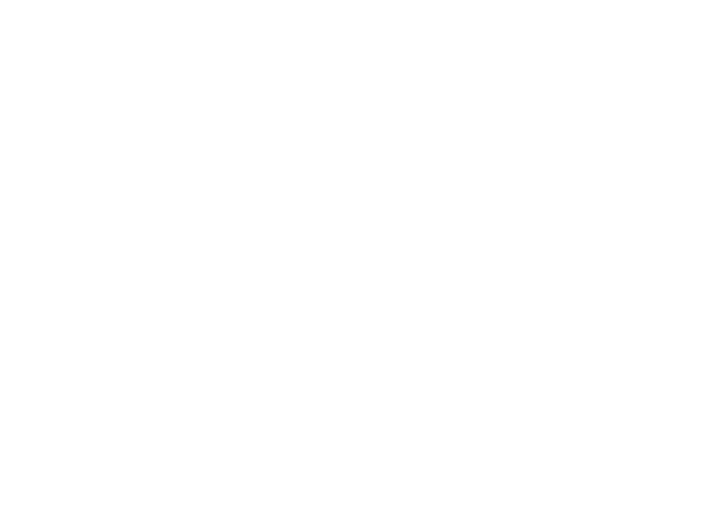

<IPython.core.display.Javascript object>


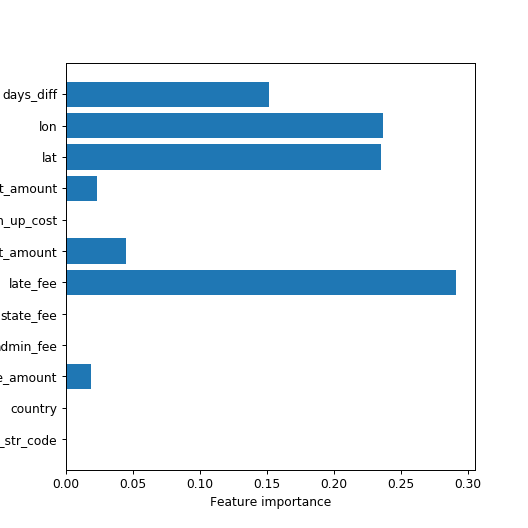

In [207]:
clf = DecisionTreeClassifier(
    criterion=  'entropy',
    random_state=0,
    max_depth=20,
).fit(X_train_scaled_1, y_train_1)
print("train accuracy= {:.3%}".format(clf.score (X_train, y_train)))


plt.figure ()
plot_feature_importances(clf, features)
